In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


Kütüphanelerin Kurulması

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Veri Kümesini Oluşturmak ve Ayırmak

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.reshape (x_train, (len(x_train), 28,28,1))
x_test = np.reshape (x_test, (len(x_test), 28,28,1))

In [ ]:
print('Eğitim:',x_train.shape)
print('Test:',x_test.shape)

Eğitim: (60000, 28, 28, 1)
Test: (10000, 28, 28, 1)


Veriye Gürültü Ekleme

In [ ]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1.)
x_test_noisy = np.clip(x_test_noisy, 0, 1.)

Gürültülü Veriyi Görselleştirme

gürültülü orijinal görüntüler


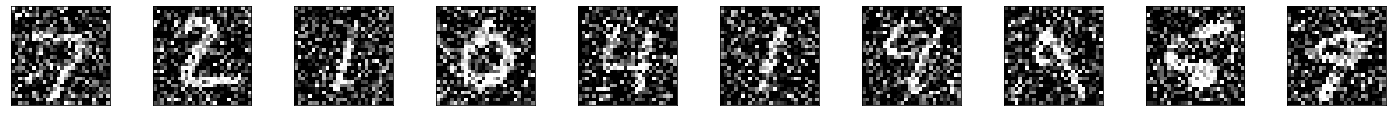

In [ ]:
%matplotlib inline

n = 10
plt.figure(figsize = (25,4))

for i in range(n):
  ax = plt.subplot(2,n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
print('gürültülü orijinal görüntüler')
plt.show()


Encode Modeli

In [ ]:
input_img = Input(shape = (28,28,1))

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img) 
x = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding = 'same')(x)
encoded.get_shape() # (7,7,32)

TensorShape([None, 7, 7, 32])

Decode Modeli

In [ ]:
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((3,3))(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((4,4))(x)

decoded = Conv2D(1,(3,3), activation = 'sigmoid', padding = 'same')(x)
decoded.get_shape()

TensorShape([None, 28, 28, 1])

Modelin Derlenmesi ve Eğitilmesi

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy,x_train,
                epochs = 10,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_train_noisy, x_test),
                callbacks = [TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoder._imgs = autoencoder.predict(x_test)

Epoch 1/10
  1/469 [..............................] - ETA: 0s - loss: 0.7212WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - ETA: 0s - loss: 0.7098

ValueError: ignored